## Using NCBI APIs

- Guillem Ylla

### NCBI Datasets

For downloading genes, genomes, taxonomy information, etc.

- https://www.ncbi.nlm.nih.gov/datasets
- https://github.com/ncbi/datasets/tree/master/training

API work in **BASH**.

### Get summary metadata

Using datasets API to get metadata for the Human reference genome

In [29]:
%%bash

~/Downloads/datasets  ## remember to set up the path to your datasets bin file


datasets is a command-line tool that is used to query and download biological sequence data
across all domains of life from NCBI databases.

Refer to NCBI's [download and install](https://www.ncbi.nlm.nih.gov/datasets/docs/v2/download-and-install/) documentation for information about getting started with the command-line tools.

Usage
  datasets [command]

Data Retrieval Commands
  summary     Print a data report containing gene, genome or virus metadata
  download    Download a gene, genome or virus dataset as a zip file
  rehydrate   Rehydrate a downloaded, dehydrated dataset

Miscellaneous Commands
  completion  Generate autocompletion scripts

Flags
      --api-key string   Specify an NCBI API key
      --debug            Emit debugging info
      --help             Print detailed help about a datasets command
      --version          Print version of datasets

Use datasets <command> --help for detailed help about a command.


In [43]:
%%bash

~/Downloads/datasets summary genome taxon human --reference  --as-json-lines > human_summary.jsonl

cat human_summary.jsonl | jq -C .  # jq is to process json in a easy-to-read format

{
  "accession": "GCF_000001405.40",
  "annotation_info": {
    "busco": {
      "busco_lineage": "primates_odb10",
      "busco_ver": "4.1.4",
      "complete": 0.99187225,
      "duplicated": 0.007256894,
      "fragmented": 0.0015239477,
      "missing": 0.0066037737,
      "single_copy": 0.9846154,
      "total_count": "13780"
    },
    "method": "Best-placed RefSeq; Gnomon; RefSeqFE; cmsearch; tRNAscan-SE",
    "name": "GCF_000001405.40-RS_2023_10",
    "pipeline": "NCBI eukaryotic genome annotation pipeline",
    "provider": "NCBI RefSeq",
    "release_date": "2023-10-02",
    "report_url": "https://www.ncbi.nlm.nih.gov/genome/annotation_euk/Homo_sapiens/GCF_000001405.40-RS_2023_10.html",
    "software_version": "10.2",
    "stats": {
      "gene_counts": {
        "non_coding": 22158,
        "other": 413,
        "protein_coding": 20080,
        "pseudogene": 17001,
        "total": 59652
      }
    },
    "status": "Updated annotation"
  },
  "assembly_info": {
    "assembly

In [58]:
%%bash
cat human_summary.jsonl | jq -C ".accession" 

cat human_summary.jsonl | jq -C ".source_database" 

cat human_summary.jsonl | jq -C ".assembly_stats.total_sequence_length" 

"GCF_000001405.40"
"SOURCE_DATABASE_REFSEQ"
"3099441038"


The "dataformat" package helps to make parse the json

In [80]:
%%bash
# let's check the available metadata  fields
#~/Downloads/dataformat tsv genome -h

Data available summarized here

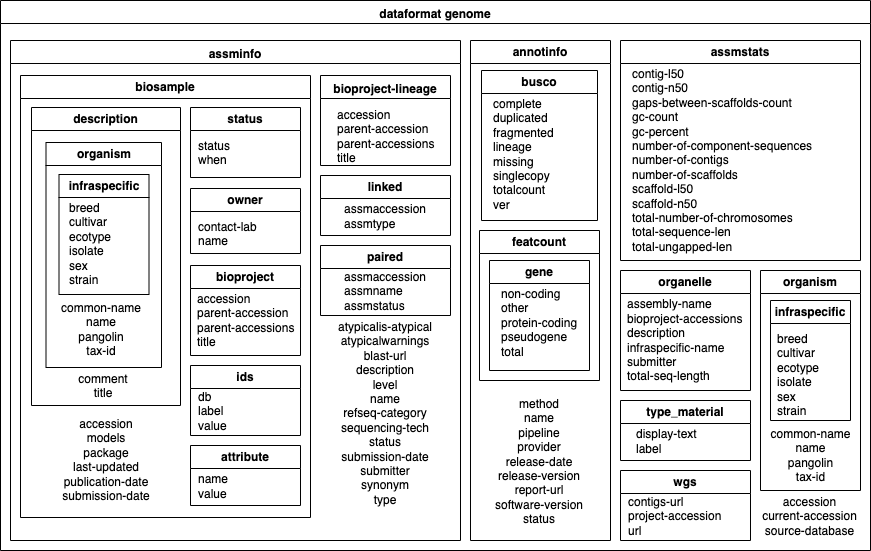

In [125]:
%%bash
~/Downloads/datasets summary genome taxon human --reference  --as-json-lines   | ~/Downloads/dataformat tsv genome --fields accession,source_database,assmstats-total-sequence-len

Assembly Accession	Source Database	Assembly Stats Total Sequence Length
GCF_000001405.40	SOURCE_DATABASE_REFSEQ	3099441038


### Check multiple genomes

Let's get info from all genomes of all Primate species. 

Save it in tsv, and load it with as pandas.


In [117]:
%%bash
~/Downloads/datasets summary genome taxon "Primates" --reference  --as-json-lines   | ~/Downloads/dataformat tsv genome --fields accession,organism-name,organism-common-name,source_database,assmstats-total-sequence-len,annotinfo-featcount-gene-total > Primate_genomes.tsv


In [118]:
import pandas as pd 
PrimateGenomes = pd.read_csv('Primate_genomes.tsv', sep='\t')    #use pandas to import carnivora.tsv
PrimateGenomes 


,Assembly Accession,Organism Name,Organism Common Name,Source Database,Assembly Stats Total Sequence Length,Annotation Count Gene Total
0,GCA_963574245.1,Allenopithecus nigroviridis,Allen's swamp monkey,SOURCE_DATABASE_GENBANK,2754543093,NaN
1,GCA_963574325.1,Allochrocebus lhoesti,L'Hoest's monkey,SOURCE_DATABASE_GENBANK,2731240566,NaN
2,GCA_963574925.1,Allochrocebus preussi,Preuss' monkey,SOURCE_DATABASE_GENBANK,2738218688,NaN
3,GCA_963575195.1,Allochrocebus solatus,sun-tailed monkey,SOURCE_DATABASE_GENBANK,2749481449,NaN
4,GCA_963574145.1,Alouatta belzebul,black-and-red howler monkey,SOURCE_DATABASE_GENBANK,2633671840,NaN
...,...,...,...,...,...,...
241,GCA_963573805.1,Trachypithecus pileatus,NaN,SOURCE_DATABASE_GENBANK,2730130862,NaN
242,GCA_963573475.1,Trachypithecus poliocephalus,White-headed langur,SOURCE_DATABASE_GENBANK,2755048657,NaN
243,GCA_963574985.1,Trachypithecus vetulus,purple-faced leaf monkey,SOURCE_DATABASE_GENBANK,2736952311,NaN
244,GCA_963573675.1,Varecia rubra,Red ruffed lemur,SOURCE_DATABASE_GENBANK,2130102279,NaN


## Download a whole genome

Datasets to download a genome data package for the human reference genome GRCh38 containing genome and rna files:


In [34]:
%%bash

~/Downloads/datasets download 


Download genome, gene and virus data packages, including sequence, annotation, and metadata, as a zip file.

Refer to NCBI's [download and install](https://www.ncbi.nlm.nih.gov/datasets/docs/v2/download-and-install/) documentation for information about getting started with the command-line tools.

Usage
  datasets download [command]

Sample Commands
  datasets download genome accession GCF_000001405.40 --chromosomes X,Y --exclude-gff3 --exclude-rna
  datasets download genome taxon "bos taurus"
  datasets download gene gene-id 672
  datasets download gene symbol brca1 --taxon mouse
  datasets download gene accession NP_000483.3
  datasets download virus genome taxon sars-cov-2 --host dog
  datasets download virus protein S --host dog --filename SARS2-spike-dog.zip

Available Commands
  gene        Download a gene data package
  genome      Download a genome data package
  virus       Download a virus data package

Flags
      --filename string   Specify a custom file name for the downl

In [ ]:
%%bash

#~/Downloads/datasets download genome taxon human --reference --include genome,rna --filename human.zip
# unzip -o human.zip -d human


In [109]:
%%bash
# let's check structure of the tree downloaded data
tree -C human

human
├── ncbi_dataset
│   └── data
│       ├── assembly_data_report.jsonl
│       ├── dataset_catalog.json
│       └── GCF_000001405.40
│           ├── GCF_000001405.40_GRCh38.p14_genomic.fna
│           └── rna.fna
└── README.md

4 directories, 5 files


## Substract specific metadata from downloaded file

The downloaded data incldues the json file, which we can query again with "datafroamt"

We will use the "dataformat" script to get

- Org name
- Assembly info
- Acession number
- Submmiter
  

In [110]:
%%bash

~/Downloads/dataformat tsv genome --package human.zip --fields organism-name,assminfo-name,accession,assminfo-submitter


Organism Name	Assembly Name	Assembly Accession	Assembly Submitter
Homo sapiens	GRCh38.p14	GCF_000001405.40	Genome Reference Consortium
